In [221]:
from datetime import datetime, timedelta, timezone
from IPython.display import clear_output
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import math
import time

pd.options.display.float_format = '{:,.3f}'.format

# Download data

### Fetching tickers from nasdaq and filtering out ETFs and stocks that we have a problem getting their prices

In [2]:
def get_all_tickers(etf=False):
    # Get a list of all available tickers from Yahoo Finance
    all_tickers = web.get_nasdaq_symbols()
    all_tickers = all_tickers[~all_tickers["Test Issue"]]  # Filter out stocks that we can't fetch their data for some reason

    if not etf:
        all_tickers = all_tickers[~all_tickers["ETF"]]  # Filter out ETFs
    tickers = all_tickers.index.tolist()
    return [str(ticker) for ticker in tickers if str(ticker).isalpha()]

In [3]:
def get_data(tickers_list, p="max"):
    return yf.download(tickers_list, period=p, interval="1d")

In [210]:
tickers = get_all_tickers()
tickers = ["TSLA", "AAPL", "MSFT", "NVDA", "GOOG", "SHEL"]
data = get_data(tickers)

[*********************100%%**********************]  6 of 6 completed


In [214]:
data_cop = data.copy()

In [215]:
new_df = pd.DataFrame(index=data_cop.index.year.unique(), columns=data_cop.columns)
new_df.drop("Adj Close", axis=1, level=0, inplace=True)
new_df.drop("Low", axis=1, level=0, inplace=True)
new_df.drop("High", axis=1, level=0, inplace=True)
new_df.drop("Open", axis=1, level=0, inplace=True)
new_df["Volume"] = data_cop["Volume"].groupby(data_cop.index.year).mean()
new_df["Close"] = data_cop["Close"].groupby(data_cop.index.year).last()
for stock in new_df["Close"].columns:
    new_df["Change", stock] = np.nan
new_df["Change"] = new_df.xs("Close", axis=1, level=0).pct_change() * 100

In [11]:
new_df.to_csv("Downloaded Stocks 2401.csv", index=True)

In [34]:
df_from_csv = pd.read_csv("Downloaded Stocks 2401.csv", header=[0, 1], index_col=0)

Close                                                      ... Change  \
          A    AA AACG  AACI AACIU AACIW  AACT  AADI AAGR AAGRW  ...   ZUMZ   
Date                                                             ...          
1962   0.00  5.47 0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  ...   0.00   
1963   0.00  6.88 0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  ...   0.00   
1964   0.00  6.16 0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  ...   0.00   
1965   0.00  7.67 0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  ...   0.00   
1966   0.00  7.85 0.00  0.00  0.00  0.00  0.00  0.00 0.00  0.00  ...   0.00   
...     ...   ...  ...   ...   ...   ...   ...   ...  ...   ...  ...    ...   
2020 118.49 23.05 1.19  0.00  0.00  0.00  0.00 14.70 0.00  0.00  ...   6.49   
2021 159.65 59.58 1.07  9.79 10.03  0.00  0.00 24.15 7.02  0.00  ...  30.48   
2022 149.65 45.47 1.27 10.12 10.12  0.00  0.00 12.83 7.09  0.00  ... -54.70   
2023 139.03 34.00 1.16 10.77 10.81  0.00 10.44  2.02 1.25  0.00  ...  -6.44   
2024 131.64 29.51 1.03 10.90 10.70  0.02 10.48  1.74 0.89  0.02  ... -12.49   

                                                                    
        ZUO   ZURA ZURAW   ZVIA   ZVRA   ZVSA    ZWS   ZYME   ZYXI  
Date                                                                
1962   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1963   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1964   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1965   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1966   0.00   0.00  0.00   0.00   0.00   0.00   0.00   0.00   0.00  
...     ...    ...   ...    ...    ...    ...    ...    ...    ...  
2020  -2.79   0.00  0.00   0.00  84.70   0.00  21.06   3.96  71.03  
2021  34.10   0.00  0.00   0.00 -22.23   0.00  -7.82 -65.32 -25.93  
2022 -65.95   0.00  0.00 -41.99 -47.30   0.00 -41.90 -52.04  53.47  
2023  47.80   0.00  0.00 -50.86  42.70 -98.36  39.05  32.19 -21.71  
2024  -0.21 -14.78  0.00 -12.44  -9.31 -31.67  -0.82  -1.06   0.92  

[63 rows x 21393 columns]

In [216]:
stocks_checklist = pd.DataFrame(index=new_df["Close"].columns, columns=["Years up", "Div yield", "Sector", "avg daily vol", "Total Revenue Incr", "Gross Margin", "Gross Profit Incr", "Trading years", "Market cap", "EPS", "P/E", "Mean change"])

stocks_checklist

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
stocks_checklist = pd.DataFrame(index=new_df["Close"].columns, columns=["Years up", "Div yield", "Sector", "avg daily vol", "Total Revenue Incr", "Gross Margin", "Gross Profit Incr", "Trading years", "Market cap", "EPS", "P/E", "Mean change"])

tickers = list(new_df["Close"].columns)  # In case some of the tickers failed, this is the ticker list straight from the returned df
# Years up in a row
tmp = new_df["Change"].copy().iloc[::-1]
tmp.fillna(-1, inplace=True)
neg_year = tmp.apply(lambda x: x[x < 0].index[0] if any(x<0) else None)
current_year = tmp.index[0]
stocks_checklist["Years up"] = current_year - neg_year.copy()
# stocks_checklist["Years up"] = 1
stocks_checklist["Mean change"] = new_df["Change"].iloc[-6:-1].apply(lambda col: col.mean())
stocks_checklist["avg daily vol"] = new_df["Volume"].copy().iloc[-1:].mean()
stocks_checklist["avg daily vol"] = stocks_checklist["avg daily vol"].fillna(0)

# Eliminate by avg daily vol, so it'll be faster
stocks_checklist = stocks_checklist[stocks_checklist["avg daily vol"] > 400000]
stocks_checklist["avg daily vol"] *= new_df["Close"].iloc[-1]  # The volume in $ so penny stocks wouldn't be so damn high

print(f"0/{len(stocks_checklist.index)}")
i = 1
for ticker in stocks_checklist.index:
    stock_info = None
    stock_income = None
    stock_div = None

    clear_output(wait=True)
    print(ticker)
    print(f"{i}/{len(stocks_checklist.index)}")
    i += 1
    tmp = yf.Ticker(ticker)
    start_date = (datetime.now() - timedelta(days = 365))
    start_date = start_date.replace(tzinfo=timezone.utc)
    while True:
        try:
            stock_info = tmp.info
            stock_income = tmp.income_stmt
            stock_div = tmp.dividends
        except ConnectionError:
            time.sleep(10)
            continue
        break
    if list(stock_div):
        div_sum = stock_div.loc[start_date:].sum()
        close_price = new_df["Close"][ticker].iloc[-1]
        div_yield = (div_sum/close_price) * 100
    else:
        div_yield = np.NaN
    # Div yield
    stocks_checklist.loc[ticker, "Div yield"] = div_yield


    # Sector
    while True:
        try:
            if "sector" in stock_info:
                stocks_checklist.loc[ticker, "Sector"] = stock_info["sector"]
        except ConnectionError:
            print("Connection error, sleeping 10")
            time.sleep(10)
            continue
        break

    if "Gross Profit" in stock_income.index:
        # Average Gross margin over the last 3 income statements
        if stock_income.loc["Total Revenue"].all() > 0:
            stocks_checklist.loc[ticker, "Gross Margin"] = ((stock_income.loc["Gross Profit"].iloc[::-1] / stock_income.loc["Total Revenue"].iloc[::-1]) * 100).mean()  # Gross margin of the last 3 years
        
        # Gross profit increase percentage over the last 3 years (3 income statements)
        stocks_checklist.loc[ticker, "Gross Profit Incr"] = stock_income.loc["Gross Profit"].iloc[::-1].pct_change().mean() * 100
    
    # Total Revenue increase percentage over the last 3 years (3 income statements)
    if "Total Revenue" in stock_income.index:
        stocks_checklist.loc[ticker, "Total Revenue Incr"] = stock_income.loc["Total Revenue"].iloc[::-1].pct_change().mean() * 100
    
    # Years since IPO
    if "firstTradeDateEpochUtc" in stock_info:
        epoch = stock_info["firstTradeDateEpochUtc"]
        if epoch > 0:
            fty = datetime.fromtimestamp(stock_info["firstTradeDateEpochUtc"]).year  # First trade year
        else:
            fty = (datetime(1970, 1, 1) + timedelta(seconds=epoch)).year
        stocks_checklist.loc[ticker, "Trading years"] = current_year - fty

    # Market Cap
    if "marketCap" in stock_info:
        stocks_checklist.loc[ticker, "Market cap"] = stock_info["marketCap"]

    # P/E Compare stock's price to EPS (Earning per share)
    if "trailingEps" in stock_info:
        eps = stock_info["trailingEps"]
        stocks_checklist.loc[ticker, "EPS"] = eps
        if "Net Income" in stock_income.index:
            net_income = stock_income.loc["Net Income"][0]
            latest_close = stock_info["currentPrice"]
            stocks_checklist.loc[ticker, "P/E"] = latest_close / eps

stocks_checklist["Div yield"].replace(0.0, np.nan, inplace=True)
stocks_checklist.replace([np.inf, -np.inf], np.nan, inplace=True)

TSLA
6/6


In [223]:
stocks_checklist

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change
AAPL,2,0.49,Technology,"11,250,622,029.66",12.75,41.86,18.80,44,3007339560960,6.13,31.73,44.42
GOOG,2,NaN,Communication Services,"2,770,625,640.35",25.47,55.30,28.39,20,1870519468032,5.22,28.80,29.09
MSFT,2,0.69,Technology,"9,578,679,443.03",14.12,68.51,14.76,38,2991930736640,10.33,38.97,35.12
NVDA,2,0.03,Technology,"29,174,625,563.90",38.12,61.55,36.52,25,1515641503744,7.60,80.74,102.41
SHEL,0,4.03,Energy,"326,222,511.10",45.33,9.06,-128.06,30,199800586240,8.42,7.30,6.21
TSLA,0,NaN,Consumer Cyclical,"21,850,704,177.03",61.01,23.97,79.24,14,660674904064,3.10,67.04,171.12


In [39]:
# stocks_checklist["avg daily vol"].fillna(0, inplace=True)
stocks_checklist.to_csv("Stocks checklist 2401.csv", index=True)

In [42]:
stocks_checklist_from_csv = pd.read_csv("Stocks checklist 2401.csv", index_col=0)

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E
A,True,False,True,True,True,True,True,True,True,True,True
AA,True,True,True,True,True,True,True,True,True,True,True
AADI,True,False,True,True,True,False,True,True,True,True,True
AAL,True,False,True,False,True,True,True,True,True,True,True
AAOI,True,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
ZTS,True,False,True,True,True,True,False,True,True,True,True
ZUO,True,False,True,True,True,False,True,True,True,True,True
ZVSA,True,False,True,True,False,False,False,True,True,True,False
ZWS,True,False,True,True,True,True,True,True,True,True,False


# Scoring

In [156]:
scores = pd.DataFrame(index=stocks_checklist.index, columns=[*stocks_checklist.columns, "Total"])  # Generate scoring dataframe

In [157]:
def total_scores(df):
    df.drop("Total", axis=1, inplace=True)
    df["Total"] = df.sum(axis=1)
    return df

### Dividend scoring

In [158]:
def div_func(x, peak1, peak2, med, sigma1, sigma2):
    f1 = (-1/(x*sigma1)) + peak2
    f2 = peak1 * np.exp(-((x-med)**2)/sigma2)
    return np.where(x < med, f2, f1)

In [159]:
peak1 = 6  # Y peak value of the first mishvaha
peak2 = 10  # Y peak value of the second mishvaha (the one where it shoef to)
starting_value = 0.4  # The score of a div yield 0

tmp = stocks_checklist["Div yield"].dropna()  # Drop no-dividend stocks
div_values = np.array(tmp.values)
div_stocks = np.array(tmp.index)
med = np.median(div_values)  # Median, to determine the peak of the first function
sigma1 = 1/(med*(peak2-peak1))  # In order for the second function to continue from where the first function stops (after the median point)
sigma2 = (med**2) / math.log(peak1/starting_value)  # Determine the slope by the starting point and peak of median
div_scores = div_func(div_values, peak1, peak2, med, sigma1, sigma2)

C:\Users\sasso\AppData\Local\Temp\ipykernel_848\1739882789.py:2: RuntimeWarning: divide by zero encountered in divide
  f1 = (-1/(x*sigma1)) + peak2


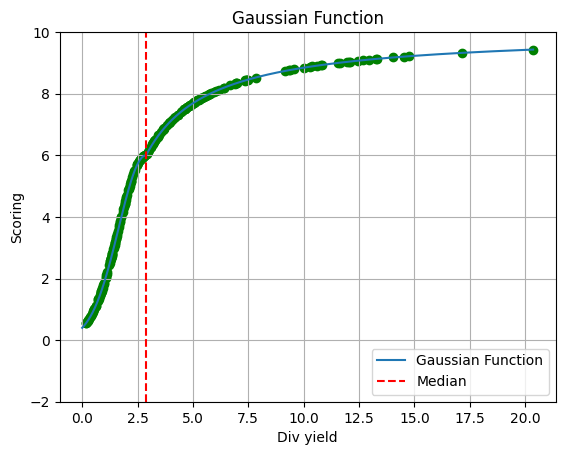

In [160]:
def plot_score(div_values, peak1, peak2, med, sigma1, sigma2):
    x_values = np.linspace(0, max(div_values), 5000)  # Generating 1000 values between 0 and 4
    y_values = div_func(x_values, peak1, peak2, med, sigma1, sigma2)
    # Calculate corresponding y values using the Gaussian function

    # Plot the function
    plt.plot(x_values, y_values, label=f'Gaussian Function')
    plt.ylim(-2, 10)  # Adjust these limits according to your needs

    plt.scatter(div_values, div_scores, color='green', marker='o')
    plt.axvline(med, color="red", linestyle="--", label="Median")
    plt.title('Gaussian Function')
    plt.xlabel('Div yield')
    plt.ylabel('Scoring')
    plt.legend()
    plt.grid(True)
plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

In [161]:
scores.loc[div_stocks, "Div yield"] = div_scores

### Trading years score

In [162]:
def ty_func(values):
    # Linear
    max_years = max(values)
    f = values/(max_years/10)
    return f

In [163]:
ty_values = stocks_checklist["Trading years"]
ty_scores = ty_func(ty_values)
# ty_scores
scores["Trading years"] = ty_scores

### Years up scoring

In [164]:
def yu_func(values):  # years up func
    f = (-1/(0.1 * values) + 10)

    return np.where(values == 0, 0, np.where(values == 1, 2, f))

In [165]:
yu_values = stocks_checklist["Years up"]
yu_scores = yu_func(yu_values)
scores["Years up"] = yu_scores

### Average daily volume & Total rev incrs scoring & Gross profit incr

In [166]:
def linear_max_func(values):  # Score 10 (max) determined by max value in values
    m = 10/max(values)
    f = m*values
    return f

In [167]:
scores["avg daily vol"] = linear_max_func(stocks_checklist["avg daily vol"])

### Gross Profit Increase

In [168]:
def arctan_func(values, low, high, angle):
    high += 5
    w = 0 - math.tan(-(low*math.pi)/high - (math.pi/2))
    # f = 15*(np.arctan(values - w)/math.pi) + 2.5
    f = (high * (np.arctan(angle*values-w) + (math.pi/2)) / math.pi) + low

    return f

In [169]:
tmp = stocks_checklist["Gross Profit Incr"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.05
gross_scores = arctan_func(tmp, low, high, sigma)
scores["Gross Profit Incr"] = gross_scores


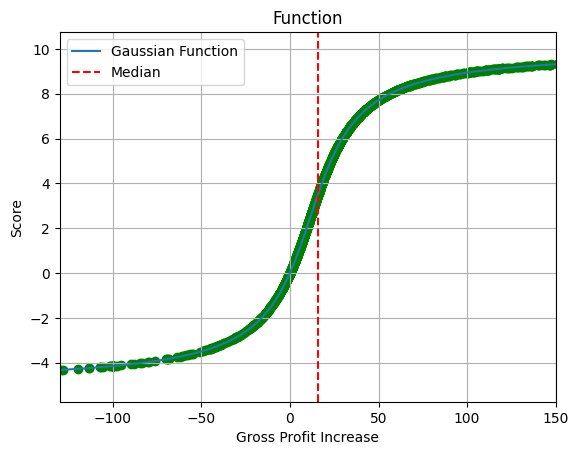

In [170]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
gross_scores = arctan_func(tmp, low, high, sigma)
y_values = arctan_func(x_values, low, high, sigma)
# Calculate corresponding y values using the Gaussian function

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, gross_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Total Rev Increase

In [171]:
tmp = stocks_checklist["Total Revenue Incr"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.05
rev_incr_scores = arctan_func(tmp, low, high, sigma)
scores["Total Revenue Incr"] = rev_incr_scores

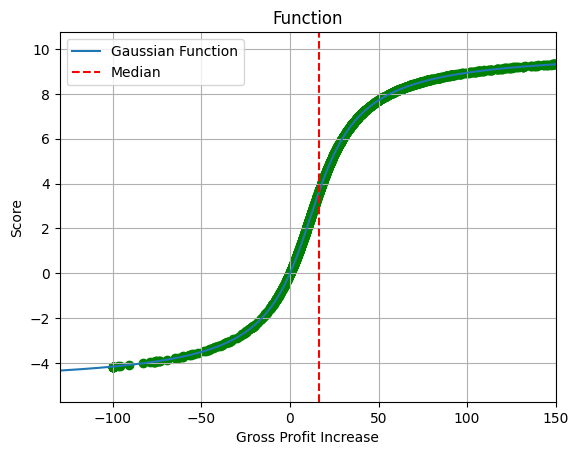

In [172]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
y_values = arctan_func(x_values, low, high, sigma)
rev_incr_scores = arctan_func(tmp, low, high, sigma)
# Calculate corresponding y values using the Gaussian function

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, rev_incr_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Gross Margin Score

In [173]:
tmp = stocks_checklist["Gross Margin"].dropna()
med = np.median(tmp)
low = -5
high = 10
sigma = 0.02
gross_margin_scores = arctan_func(tmp, low, high, sigma)
scores["Gross Margin"] = gross_margin_scores

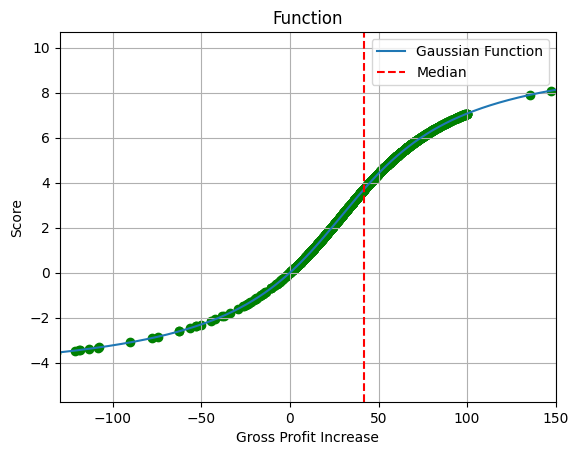

In [174]:
# Plot

x_values = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
y_values = arctan_func(x_values, low, high, sigma)

# Plot the function
plt.plot(x_values, y_values, label=f'Gaussian Function')
# plt.ylim(-2, 10)  # Adjust these limits according to your needs
plt.xlim(-130, 150)
plt.scatter(tmp, gross_margin_scores, color='green', marker='o')
plt.axvline(med, color="red", linestyle="--", label="Median")
plt.title('Function')
plt.xlabel('Gross Profit Increase')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
# plot_score(div_values, peak1, peak2, med, sigma1, sigma2)

### Get Market cap score

In [175]:
def linear_mean_func(values, med_score, med):
    # m = med_score/np.median(values)
    # sigma2 = 0.001
    m1 = med_score/med
    f1 = m1*values
    # x1 = 8/m1  # The x value when y=8 in the first function
    # f2 = -(1/(values-x1)*sigma2) + 10
    # print(x1)
    # print(m1)
    # return np.where(f1 <= 8, f1, f2)
    return np.where(f1 <= 10, f1, 10)

In [176]:
market_cap_vals = stocks_checklist["Market cap"]
market_cap_scores = linear_mean_func(market_cap_vals, 5, market_cap_vals.mean())
scores["Market cap"] = market_cap_scores

In [205]:
def plot(values, func, params=None):
    # plot_x = np.linspace(-130, 150, 5000)  # Generating 1000 values between 0 and 4
    values = values.dropna()
    plot_x = np.linspace(min(values), max(values), 5000)  # Generating 1000 values between 0 and 4
    if params:
        plot_scores = func(values, *params)
        plot_y = func(plot_x, *params)
    else:
        plot_scores = func(values)
        plot_y = func(plot_x)
    med = np.median(values)  # Median, to determine the peak of the first function
    # print(med)
    # Plot the function
    plt.plot(plot_x, plot_y, label=f'Gaussian Function')
    plt.ylim(-1, 11)  # Adjust these limits according to your needs
    plt.xlim(-1, 16)
    # plt.scatter(values, plot_scores, color='green', marker='o')
    plt.axvline(med, color="red", linestyle="--", label="Median")
    # plt.axvline(values.mean(), color="green", linestyle="--", label="Median")
    plt.title('Function')
    plt.xlabel('Values')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)

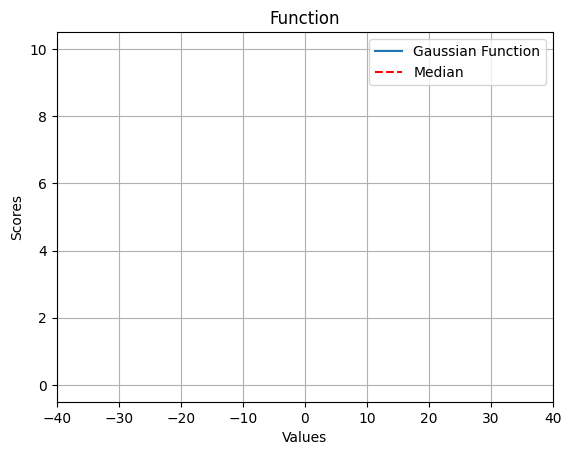

In [178]:
plot(stocks_checklist["Market cap"], linear_mean_func, [5, stocks_checklist["Market cap"].mean()])

### EPS Scoring

In [179]:
def linear_2points(values, pt1, pt2):
    # pt - tuple (x, y)
    slope = (pt1[1] - pt2[1])/(pt1[0] - pt2[0])
    f = slope*values
    return f

In [180]:
def linear_2points_zero(values, min_score, max_score):
    f1 = linear_2points(values, (0, 0), (min(values), min_score))
    f2 = linear_2points(values, (0, 0), (max(values), max_score))
    return np.where(values < 0, f1, f2)

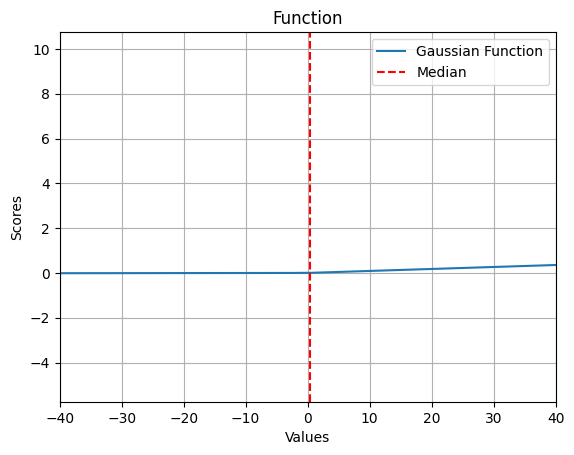

In [181]:
plot(stocks_checklist["EPS"], linear_2points_zero, [-5, 10])

In [182]:
scores["EPS"] = linear_2points_zero(stocks_checklist["EPS"], -5, 10)
scores["P/E"] = linear_2points_zero(stocks_checklist["P/E"], -5, 10)

### Mean Change % score

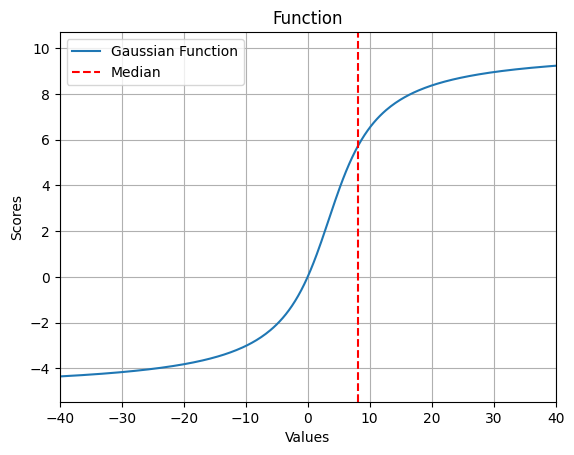

In [183]:
# stocks_checklist["Mean change"]
plot(stocks_checklist["Mean change"], arctan_func, [-5, 10, 0.17])
scores["Mean change"] = arctan_func(stocks_checklist["Mean change"], -5, 10, 0.17)

In [184]:
scores

,Years up,Div yield,Sector,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Total
A,0.000,NaN,NaN,0.071,1.857,4.649,1.542,4.032,8.287,0.037,0.024,8.095,NaN
AA,0.000,2.801,NaN,0.071,3.696,1.565,7.769,10.000,1.132,-0.001,-0.008,8.331,NaN
AADI,0.000,NaN,NaN,0.000,9.854,6.930,9.925,0.968,0.009,-0.001,-0.001,-3.493,NaN
AAL,5.000,NaN,NaN,0.219,8.378,-0.516,9.994,3.065,1.966,0.021,0.004,-3.317,NaN
AAOI,0.000,NaN,NaN,0.019,-0.384,1.492,-2.167,1.774,0.148,-0.001,-0.009,9.813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,NaN,NaN,0.124,2.179,5.772,2.287,1.774,10.000,0.043,0.029,8.696,NaN
ZUO,0.000,NaN,NaN,0.004,2.799,4.974,4.338,0.968,0.288,-0.000,-0.008,-0.848,NaN
ZVSA,0.000,NaN,NaN,0.000,NaN,NaN,NaN,0.323,0.000,-0.025,-0.000,-4.724,NaN
ZWS,0.000,NaN,NaN,0.009,5.683,3.720,3.740,1.935,1.083,0.005,0.040,6.700,NaN


# Total score score

In [185]:
scores_cop = scores.copy()

In [186]:
# scores = scores_cop.copy()
# scores

In [190]:
scores = scores_cop.copy()

if "Sector" in scores.columns:
    scores.drop("Sector", axis=1, inplace=True)
if "Total" in scores.columns:
    scores.drop("Total", axis=1, inplace=True)

multipliers = {"Years up": 7, "Div yield": 4, "avg daily vol": 4, "Total Revenue Incr": 5, "Gross Margin": 5, "Gross Profit Incr": 7, "Trading years": 4, "Market cap": 7, "EPS": 7, "P/E": 6, "Mean change": 7}
multiplier_max = {key: val * 10 for key, val in multipliers.items()}
for column in scores.columns:
    scores[column] *= multipliers[column]
# scores_zerod = scores.fillna(0)
# max_nan = scores.applymap(lambda x: np.nan if pd.notna(x) else 1)
tmp_scores = scores.applymap(lambda x: -1 if pd.isna(x) else 0)
tmp_scores = tmp_scores.apply(lambda col: col*(multipliers[col.name]*10))
tmp_scores = tmp_scores.sum(axis=1)
scores["Total"] = scores.sum(axis=1)
scores["Max Score"] = sum(multiplier_max.values())
scores["Max Score"] = scores["Max Score"] + tmp_scores
scores["Score"] = (scores["Total"] / scores["Max Score"]) * 100
scores.drop("Max Score", axis=1, inplace=True)
scores.drop("Total", axis=1, inplace=True)
scores

,Years up,Div yield,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Score
A,0.000,NaN,0.283,9.284,23.246,10.791,16.129,58.012,0.259,0.144,56.663,29.629
AA,0.000,11.205,0.285,18.478,7.825,54.382,40.000,7.921,-0.008,-0.049,58.316,31.485
AADI,0.000,NaN,0.001,49.269,34.651,69.476,3.871,0.064,-0.005,-0.005,-24.451,22.521
AAL,35.000,NaN,0.877,41.888,-2.579,69.960,12.258,13.761,0.148,0.027,-23.218,25.105
AAOI,0.000,NaN,0.075,-1.920,7.461,-15.169,7.097,1.033,-0.005,-0.052,68.692,11.392
...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,NaN,0.495,10.897,28.858,16.010,7.097,70.000,0.304,0.175,60.869,33.001
ZUO,0.000,NaN,0.015,13.993,24.869,30.363,3.871,2.019,-0.003,-0.049,-5.934,11.719
ZVSA,0.000,NaN,0.001,NaN,NaN,NaN,1.290,0.002,-0.174,-0.000,-33.070,-7.608
ZWS,0.000,NaN,0.037,28.413,18.602,26.181,7.742,7.582,0.035,0.238,46.898,23.005


In [191]:
scores.to_csv("Scores 2401.csv", index=True)

In [192]:
scores_100 = scores.copy()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
scores_100 = scores_100.apply(lambda col: (col/col.max())*100)
scores_100["Sector"] = stocks_checklist["Sector"]
scores_100

,Years up,Div yield,avg daily vol,Total Revenue Incr,Gross Margin,Gross Profit Incr,Trading years,Market cap,EPS,P/E,Mean change,Score,Sector
A,0.000,NaN,0.708,18.569,46.730,15.418,40.323,82.875,0.370,0.239,81.146,48.202,Healthcare
AA,0.000,29.695,0.713,36.958,15.729,77.701,100.000,11.316,-0.012,-0.082,83.514,51.221,Basic Materials
AADI,0.000,NaN,0.003,98.546,69.657,99.268,9.677,0.092,-0.007,-0.008,-35.016,36.638,Healthcare
AAL,53.125,NaN,2.192,83.783,-5.184,99.958,30.645,19.659,0.211,0.045,-33.250,40.842,Industrials
AAOI,0.000,NaN,0.187,-3.841,14.997,-21.673,17.742,1.476,-0.007,-0.087,98.373,18.532,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTS,0.000,NaN,1.238,21.796,58.011,22.876,17.742,100.000,0.434,0.292,87.171,53.687,Healthcare
ZUO,0.000,NaN,0.038,27.988,49.993,43.382,9.677,2.884,-0.004,-0.082,-8.498,19.065,Technology
ZVSA,0.000,NaN,0.003,NaN,NaN,NaN,3.226,0.002,-0.249,-0.000,-47.359,-12.376,Healthcare
ZWS,0.000,NaN,0.091,56.831,37.394,37.408,19.355,10.831,0.049,0.397,67.163,37.425,Industrials


In [200]:
# stocks_checklist[stocks_checklist["Sector"] == "Energy"].index.to_series().to_csv("Energy tickers.txt", index=False, header=False)

In [209]:
stocks_checklist["Div yield"].median()

2.8862179416488862